In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100
import plotly.graph_objects as go
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [20]:
a = 0
b = 1
c = 0
d = 1
T = 2
tau = 0.01
h_x = 0.05
h_y = 0.05
M = int(T/tau) + 1
N_x = int((b-a)/h_x) + 1
N_y = int((d-c)/h_y) + 1
U = np.zeros((M, N_x, N_y))

for i in range(N_x):
    for j in range(N_y):
        U[0][i][j] = 1

for n in range(1, M):
    U_half = np.zeros((N_x, N_y))
    for j in range(0, N_y):
        if j == 0:
            U_half[:,0] = np.zeros(N_x)
        elif j == N_y - 1:
            U_half[:,N_y - 1] = np.zeros(N_x)
        else:
            A = np.zeros((N_x, N_x))
            B = np.zeros(N_x)
            for i in range(0, N_x):
                if i == 0:
                    A[0][0] = 1
                    B[0] = 0
                elif i == N_x-1:
                    A[N_x - 1][N_x - 1] = 1
                    B[N_x - 1] = 0
                else:
                    A[i][i-1] = tau/2/h_x**2
                    A[i][i] = -(tau/h_x**2 + 1)
                    A[i][i+1] = tau/2/h_x**2
                    B[i] = -(tau/2/h_y**2*(U[n-1][i][j+1]-2*U[n-1][i][j]+U[n-1][i][j-1]) + U[n-1][i][j])
            U_half[:,j] = np.linalg.solve(A, B)
    for i in range(0, N_x):
        if i == 0:
            U[n][0] = np.zeros(N_y)
        elif i == N_x - 1:
            U[n][N_x - 1] = np.zeros(N_y)
        else:
            A = np.zeros((N_y, N_y))
            B = np.zeros(N_y)
            for j in range(0, N_y):
                if j == 0:
                    A[0][0] = 1
                    B[0] = 0
                elif j == N_y-1:
                    A[N_y - 1][N_y - 1] = 1
                    B[N_y - 1] = 0
                else:
                    A[j][j-1] = tau/2/h_y**2
                    A[j][j] = -(tau/h_y**2 + 1)
                    A[j][j+1] = tau/2/h_y**2
                    B[j] = -(tau/2/h_x**2*(U_half[i+1][j]-2*U_half[i][j]+U_half[i-1][j]) + U_half[i][j])
            U[n][i] = np.linalg.solve(A, B)
    

array([[[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        ...,
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.23516474e-22, -1.43050602e-06, -2.14575493e-06, ...,
         -2.14575493e-06, -1.43050602e

In [12]:
sh_t, sh_x, sh_y = U.shape
fig = go.Figure()
fig.add_surface(
    # contours = {
    #     "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
    #     "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
    # },
    x = np.linspace(a, b, sh_x),
    y = np.linspace(c, d, sh_y),
    z = U[20]
    )
# fig.add_scatter3d(name='scat_p', x=np.linspace(a, b, sh_1), y=np.linspace(0, T, sh_0), z=U, mode='markers',
#     marker=dict(size=10, color='black',colorscale='Reds'))
# fig.update_layout(
#         scene = {
#             "xaxis": {"nticks": 20},
#             "zaxis": {"nticks": 4},
#             'camera_eye': {"x": 0, "y": -1, "z": 0.5},
#             "aspectratio": {"x": 1, "y": 1, "z": 0.2}
#         })
fig.update_layout(title='surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=5, r=50, b=5, t=55))
fig.show()

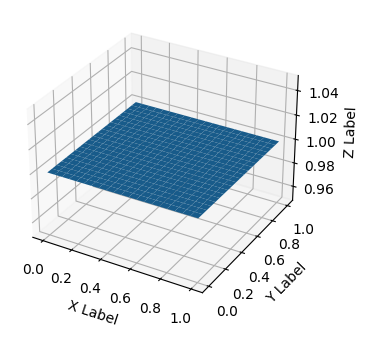

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sh_t, sh_x, sh_y = U.shape
x = np.linspace(a, b, sh_x)
y = np.linspace(c, d, sh_y)
X, Y = np.meshgrid(x, y)
U_m = U[0]

ax.plot_surface(X, Y, U_m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
y

MovieWriter imagemagick unavailable; using Pillow instead.


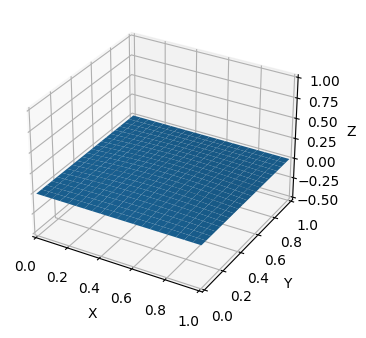

In [24]:
sh_t, sh_x, sh_y = U.shape
x = np.linspace(a, b, sh_x)
y = np.linspace(c, d, sh_y)
X, Y = np.meshgrid(x, y)
U_m = U[0]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def update(num):
    U_m = U[num]
    ax.clear()
    # Setting the axes properties
    ax.set_xlim3d([0, 1])
    ax.set_xlabel('X')

    ax.set_ylim3d([0, 1])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 1])
    ax.set_zlabel('Z')
    surface = ax.plot_surface(X, Y, U_m)

N = sh_t//10

ani = animation.FuncAnimation(fig, update, N, interval=10000/N, blit=False)
ani.save('matplot003.gif', writer='imagemagick')
plt.show()